In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


import pandas as pd

In [15]:

categories = [ 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
             'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc']

newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'),
                               categories= categories)



In [16]:
target_dict = dict(enumerate(newsgroups['target_names']))

df = pd.DataFrame(zip(newsgroups['data'], newsgroups['target']),  
                  columns = ['text','newsgroup'])

df['newsgroup'].replace(target_dict, inplace = True)

df.sample(5)

,text,newsgroup
689,This seems to be a simple problem but I just c...,comp.graphics
645,,comp.graphics
3123,\nHmmmmm you know this happened to me also.\nI...,comp.os.ms-windows.misc
3087,NUT CASE PANICS!!!!JUMPS THE GUN ON THE NET BE...,talk.politics.guns
1822,"\n\nI know nothing about statistics, but what ...",talk.politics.mideast


In [17]:
# https://stackoverflow.com/questions/52986253/scoring-strategy-of-sklearn-model-selection-gridsearchcv-for-latentdirichletallo

class LDAp(LatentDirichletAllocation):

    def score(self, X, y=None):

        # You can change the options passed to perplexity here
        score = super(LDAp, self).perplexity(X, sub_sampling=False)

        # Since perplexity is lower for better, so we do negative
        return -1*score
    

In [18]:
vectorizer = CountVectorizer(stop_words='english')

In [19]:
tm = LDAp(verbose=1, evaluate_every = 5, perp_tol = 1, max_iter = 100, )

In [20]:
pipe = Pipeline(steps=[('vectorizer', vectorizer), 
                       ('tm', tm)])

In [21]:
param_grid = {'tm__n_components': [2,4,6,8,10],
             'vectorizer__max_features' : [200, 400, 600, 800, 1000]}

In [22]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=3, verbose=1)
search.fit(df['text'])

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.5min finished


iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 22.7429
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 22.3630


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('tm',
                                        LDAp(evaluate_every=5, max_iter=100,
                                             perp_tol=1, verbose=1))]),
             n_jobs=-1,
             param_grid={'tm__n_components': [2, 4, 6, 8, 10],
                         'vectorizer__max_features': [200, 400, 600, 800,
                                                      1000]},
             verbose=1)

In [23]:
gs_df = pd.DataFrame(search.cv_results_)

In [24]:
gs_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tm__n_components,param_vectorizer__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,50.128063,2.278849,2.549208,0.025875,10,200,"{'tm__n_components': 10, 'vectorizer__max_feat...",-10.807397,-51.760296,-36.843821,-33.137171,16.923148,1
15,33.898867,4.298251,1.715082,0.059699,8,200,"{'tm__n_components': 8, 'vectorizer__max_featu...",-10.701868,-52.481083,-36.485226,-33.222726,17.211597,2
10,31.463021,0.672638,1.736623,0.037388,6,200,"{'tm__n_components': 6, 'vectorizer__max_featu...",-10.796580,-53.022624,-36.813489,-33.544231,17.393020,3
5,38.512694,1.932843,1.727133,0.122462,4,200,"{'tm__n_components': 4, 'vectorizer__max_featu...",-10.832561,-52.853767,-38.401454,-34.029260,17.431437,4
0,18.119419,3.766585,1.458967,0.037801,2,200,"{'tm__n_components': 2, 'vectorizer__max_featu...",-11.806973,-61.802352,-44.165490,-39.258272,20.703382,5
16,39.142025,5.316985,1.873124,0.096825,8,400,"{'tm__n_components': 8, 'vectorizer__max_featu...",-22.141217,-111.712379,-86.111511,-73.321702,37.669021,6
21,47.361231,7.238644,1.886496,0.055928,10,400,"{'tm__n_components': 10, 'vectorizer__max_feat...",-22.155396,-111.531567,-87.250195,-73.645719,37.734478,7
11,39.837985,6.370991,1.874463,0.036180,6,400,"{'tm__n_components': 6, 'vectorizer__max_featu...",-23.249540,-115.163942,-85.449746,-74.621076,38.297166,8
6,37.634666,3.625831,1.843671,0.058188,4,400,"{'tm__n_components': 4, 'vectorizer__max_featu...",-22.483053,-122.000457,-88.617163,-77.700224,41.354670,9
1,18.374987,1.566496,1.388929,0.053946,2,400,"{'tm__n_components': 2, 'vectorizer__max_featu...",-25.605841,-138.046117,-105.321718,-89.657892,47.220903,10


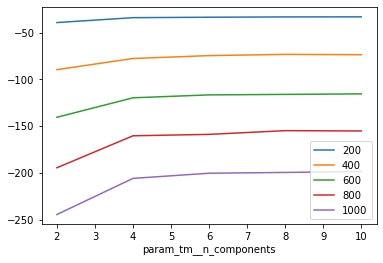

In [25]:
%matplotlib inline

df = gs_df.copy()

df.set_index('param_tm__n_components', inplace=True)
df.groupby('param_vectorizer__max_features')['mean_test_score'].plot(legend=True);

